In [64]:
from tqdm import tqdm_notebook as tqdm
from SARI import *

In [2]:
# examples
ssent = "About 95 species are currently accepted ."
csent1 = "About 95 you now get in ."
csent2 = "About 95 species are now agreed ."
csent3 = "About 95 species are currently agreed ."
rsents = ["About 95 species are currently known .", "About 95 species are now accepted .", "95 species are now accepted ."]

print(SARIsent(ssent, csent1, rsents))
print(SARIsent(ssent, csent2, rsents))
print(SARIsent(ssent, csent3, rsents))

0.2682782411698074
0.5889995423074248
0.5071608864657479


In [45]:
def load_standard_test(filename):
    turkset = []
    with open(filename,"r", encoding="utf-8") as f:
        lines = f.readlines()
        for line in lines:
            piece = line.rstrip().split('\t')
            temp_dict = {}
            temp_dict["input"] = piece[1]
            temp_dict["reference"] = piece[2:]
            turkset.append(temp_dict)
            
    return turkset


def load_output(output_path, scope=["Dress", "Dress-Ls", "EncDecA", "Hybrid", "PBMT-R"]):
    output_collection = dict()
    
    for model in scope:
        output_collection[model] = []
        with open(output_path+model,encoding="utf-8") as f:
            lines = f.readlines()
            for line in lines:
                output_collection[model].append(line.rstrip())
                
    return output_collection
            

In [46]:
wikilarge_test = load_standard_test("/home/guest/hzhangal/wsd/ts/datasets/wikilarge/test_8_ref/test.8turkers.organized.tsv")
output_collection = load_output("/home/guest/hzhangal/wsd/ts/sys_output/WikiLarge/test/", scope=["Dress", "Dress-Ls", "EncDecA", "Hybrid", "PBMT-R"])

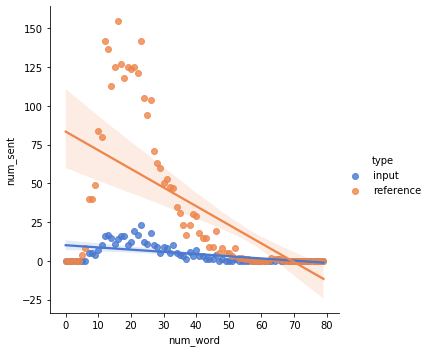

In [47]:
import seaborn as sns
#sns.set_theme(style="ticks")
import pandas as pd
from nltk.tokenize import word_tokenize
import numpy as np


# visualize the sentence length

nums = list(range(80))
num_e = []
ty = []

for i in nums:
    num_e.append(0)
    ty.append("input")
    
num_r = []
for i in nums:
    num_r.append(0)
    ty.append("reference")

for piece in wikilarge_test:
    # print(len(word_tokenize(piece["input"])))
    num_e[len(word_tokenize(piece["input"]))] += 1
    
    for sent in piece["reference"]:
        num_r[len(word_tokenize(sent))] += 1


# Load the example dataset for Anscombe's quartet
df = pd.DataFrame()#sns.load_dataset("anscombe")
nums.extend(nums)
df["num_word"] = np.array(nums)
num_sent = num_e + num_r
df["num_sent"] = np.array(num_sent)
df["type"] = np.array(ty)


# Show the results of a linear regression within each dataset
sns.lmplot(x="num_word", y="num_sent", hue="type", data=df,
           palette="muted")

36
29.625
--------------
27
27.5
--------------
18
17.5
--------------
19
16.75
--------------
35
31.5
--------------
12
11.25
--------------
13
13.75
--------------
26
24.625
--------------
33
26.625
--------------
40
39.5
--------------
20
18.25
--------------
18
18.125
--------------
18
16.5
--------------
30
29.625
--------------
16
13.75
--------------
14
14.375
--------------
12
10.75
--------------
7
8.125
--------------
11
10.625
--------------
19
17.5
--------------
15
14.875
--------------
17
16.75
--------------
23
20.0
--------------
17
17.125
--------------
33
33.625
--------------
27
25.375
--------------
24
22.375
--------------
31
28.25
--------------
17
16.375
--------------
18
17.875
--------------
17
16.25
--------------
22
25.375
--------------
19
19.125
--------------
13
14.125
--------------
33
26.5
--------------
31
26.75
--------------
21
19.625
--------------
28
25.875
--------------
8
8.375
--------------
23
23.75
--------------
39
39.5
--------------
15
14.0


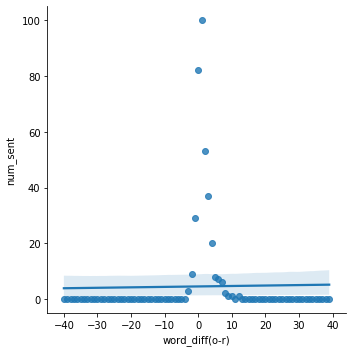

In [116]:
# visualize the num of word difference
nums = list(range(80))

for i in nums:
    nums[i] -= 40
    

num_e = []

for i in nums:
    num_e.append(0)
    

for piece in wikilarge_test:
    original_len = len(word_tokenize(piece["input"]))
    
    new_len = 0
        
    for sent in piece["reference"]:
        new_len += len(word_tokenize(sent))
        
    new_len /= len(piece["reference"])
    
    print(original_len)
    print(new_len)
    print("--------------")
    
    num_e[original_len - int(new_len)-40] += 1

    
df = pd.DataFrame()#sns.load_dataset("anscombe")

df["word_diff(o-r)"] = np.array(nums)
df["num_sent"] = np.array(num_e)


# Show the results of a linear regression within each dataset
sns.lmplot(x="word_diff(o-r)", y="num_sent", data=df,
           palette="muted")

In [49]:
print(len(wikilarge_test))

359


In [50]:
# !pip install transformers==3.1.0
# from transformers import *

In [71]:
from transformers import pipeline
nlp = pipeline("fill-mask", model="bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMaskedLM were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['cls.predictions.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [98]:
import time
s = time.time()
print(nlp.tokenizer.mask_token)
trial1 = nlp(" This is the best thing I've "+ nlp.tokenizer.mask_token +" in my life.", targets=[' experienced'])
print(trial1[0]["score"])
trial1 = nlp(" This is the best thing I've [MASK] in my life.", targets=[' experienced'])
e = time.time()

print("Time:",e-s)

print(trial1[0]["score"])
trial2= nlp(f"{nlp.tokenizer.mask_token}.", targets=['experience',' experienced'])
print(trial2[0]["score"], trial2[1]["score"])

[MASK]
0.02345082350075245
Time: 0.3359556198120117
0.02345082350075245
5.88793682254618e-06 3.1196098007058026e-06


In [121]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def bert_sent_score(sent1, sent2=None):

    scores_1 = 1
    #scores_2 = 0
    
    # tokens_1 = tokenizer.tokenize(sent1)
    #tokens_2 = tokenizer.tokenize(sent1)
    tokens_1 = word_tokenize(sent1)
    
    for i in range(len(tokens_1)-1):
        mask_text = ""
        for j in range(len(tokens_1)-1):
            if i == j:
                    mask_text += "[MASK]"
                    mask_text += " "
            else:
                mask_text += tokens_1[j]
                mask_text += " "
                
        mask_text += "."
        
#         print(mask_text)
#         print(tokens_1[i])
        trial = nlp(mask_text, targets=[tokens_1[i]])
        score = trial[0]["score"]
        
        scores_1 *= score
    # print(scores_1)
    # return np.sqrt(scores_1 * 10^int(len(tokens_1)-1),order=len(tokens_1)-1)
    return scores_1  
    
def compute_sent_bert_score(test_set, output_set, scope=["Dress", "Dress-Ls", "EncDecA", "Hybrid", "PBMT-R"]):
    score_collector = dict()
    score_collector["Reference"] = []
    
    for model in scope:
        score_collector[model] = []
    
    for i, piece in tqdm(enumerate(test_set)):
        original = piece["input"]
        references = piece["reference"]

        
        i_score = bert_sent_score(original)
        r_scores = []
        
        for r in references:
            r_scores.append(bert_sent_score(r))
        r_score = np.mean(r_scores)
        
        score_collector["Reference"].append(r_score/i_score)
        
        
#         print("Original:")
#         print(piece["input"])
#         print("Reference:")
#         print(piece["reference"][0])
#         print("-----------------")
        for model in scope:

            output = output_set[model][i]
            o_score = bert_sent_score(output)
            score_collector[model].append(o_score/i_score)
            
#             print(model+":")
#             print(output)
#             print("-----------------")
        
#         print(score_collector)
            
            
            
    return score_collector
        
        

In [ ]:
score_collector = compute_sent_bert_score(wikilarge_test, output_collection)
for key, value in score_collector.items():
    print(key)
    print(np.mean(value))
    print("----------------------------------------")

/home/guest/.local/lib/python3.6/site-packages/ipykernel_launcher.py:41: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


The specified target token `Janjaweed` does not exist in the model vocabulary. Replacing with `jan`.
The specified target token `Afro-Arab` does not exist in the model vocabulary. Replacing with `afro`.
The specified target token `Abbala` does not exist in the model vocabulary. Replacing with `ab`.
The specified target token `Rizeigat` does not exist in the model vocabulary. Replacing with `ri`.
The specified target token `Janjaweed` does not exist in the model vocabulary. Replacing with `jan`.
The specified target token `Afro-Arab` does not exist in the model vocabulary. Replacing with `afro`.
The specified target token `Abbala` does not exist in the model vocabulary. Replacing with `ab`.
The specified target token `Rizeigat` does not exist in the model vocabulary. Replacing with `ri`.
The specified target token `Janjaweed` does not exist in the model vocabulary. Replacing with `jan`.
The specified target token `Afro-Arab` does not exist in the model vocabulary. Replacing with `afro`.

The specified target token `'s` does not exist in the model vocabulary. Replacing with `'`.
The specified target token `holiest` does not exist in the model vocabulary. Replacing with `ho`.
The specified target token `able-bodied` does not exist in the model vocabulary. Replacing with `able`.
The specified target token `jeddah` does not exist in the model vocabulary. Replacing with `jed`.
The specified target token `'s` does not exist in the model vocabulary. Replacing with `'`.
The specified target token `Jeddah` does not exist in the model vocabulary. Replacing with `jed`.
The specified target token `'s` does not exist in the model vocabulary. Replacing with `'`.
The specified target token `holiest` does not exist in the model vocabulary. Replacing with `ho`.
The specified target token `eventful` does not exist in the model vocabulary. Replacing with `event`.
The specified target token `neurosurgeon` does not exist in the model vocabulary. Replacing with `ne`.
The specified target to

The specified target token `Greenaway` does not exist in the model vocabulary. Replacing with `green`.
The specified target token `Mears` does not exist in the model vocabulary. Replacing with `me`.
The specified target token `Greenaway` does not exist in the model vocabulary. Replacing with `green`.
The specified target token `Mears` does not exist in the model vocabulary. Replacing with `me`.
The specified target token `Greenway` does not exist in the model vocabulary. Replacing with `green`.
The specified target token `Mears` does not exist in the model vocabulary. Replacing with `me`.
The specified target token `Greenaway` does not exist in the model vocabulary. Replacing with `green`.
The specified target token `Mears` does not exist in the model vocabulary. Replacing with `me`.
The specified target token `Greenaway` does not exist in the model vocabulary. Replacing with `green`.
The specified target token `Mears` does not exist in the model vocabulary. Replacing with `me`.
The sp

The specified target token `Cassini` does not exist in the model vocabulary. Replacing with `cass`.
The specified target token `Huygens` does not exist in the model vocabulary. Replacing with `hu`.
The specified target token `Christiaan` does not exist in the model vocabulary. Replacing with `christi`.
The specified target token `Huygens` does not exist in the model vocabulary. Replacing with `hu`.
The specified target token `Cassini` does not exist in the model vocabulary. Replacing with `cass`.
The specified target token `orbiter` does not exist in the model vocabulary. Replacing with `orbit`.
The specified target token `Cassini` does not exist in the model vocabulary. Replacing with `cass`.
The specified target token `Huygens` does not exist in the model vocabulary. Replacing with `hu`.
The specified target token `Christiaan` does not exist in the model vocabulary. Replacing with `christi`.
The specified target token `Huygens` does not exist in the model vocabulary. Replacing with `

The specified target token `Sandro` does not exist in the model vocabulary. Replacing with `sand`.
The specified target token `Mazzola` does not exist in the model vocabulary. Replacing with `ma`.
The specified target token ```` does not exist in the model vocabulary. Replacing with ```.
The specified target token `Sandro` does not exist in the model vocabulary. Replacing with `sand`.
The specified target token ```` does not exist in the model vocabulary. Replacing with ```.
The specified target token `Mazzola` does not exist in the model vocabulary. Replacing with `ma`.
The specified target token ```` does not exist in the model vocabulary. Replacing with ```.
The specified target token `Sandro` does not exist in the model vocabulary. Replacing with `sand`.
The specified target token ```` does not exist in the model vocabulary. Replacing with ```.
The specified target token `Mazzola` does not exist in the model vocabulary. Replacing with `ma`.
The specified target token `Alessando` do

The specified target token `Wexler` does not exist in the model vocabulary. Replacing with `we`.
The specified target token `Wexler` does not exist in the model vocabulary. Replacing with `we`.
The specified target token `Wexler` does not exist in the model vocabulary. Replacing with `we`.
The specified target token `Wexler` does not exist in the model vocabulary. Replacing with `we`.
The specified target token `Wexler` does not exist in the model vocabulary. Replacing with `we`.
The specified target token `Wexler` does not exist in the model vocabulary. Replacing with `we`.
The specified target token `Wexler` does not exist in the model vocabulary. Replacing with `we`.
The specified target token `wexler` does not exist in the model vocabulary. Replacing with `we`.
The specified target token `Wexler` does not exist in the model vocabulary. Replacing with `we`.
The specified target token `dextromethorphan` does not exist in the model vocabulary. Replacing with `dex`.
The specified targe

The specified target token `''` does not exist in the model vocabulary. Replacing with `'`.
The specified target token `''` does not exist in the model vocabulary. Replacing with `'`.
The specified target token `''` does not exist in the model vocabulary. Replacing with `'`.
The specified target token `''` does not exist in the model vocabulary. Replacing with `'`.
The specified target token `''` does not exist in the model vocabulary. Replacing with `'`.
The specified target token `''` does not exist in the model vocabulary. Replacing with `'`.
The specified target token `''` does not exist in the model vocabulary. Replacing with `'`.
The specified target token `''` does not exist in the model vocabulary. Replacing with `'`.
The specified target token `''` does not exist in the model vocabulary. Replacing with `'`.
The specified target token `''` does not exist in the model vocabulary. Replacing with `'`.
The specified target token `Fives` does not exist in the model vocabulary. Repla

The specified target token `Tagore` does not exist in the model vocabulary. Replacing with `tag`.
The specified target token `craftwork` does not exist in the model vocabulary. Replacing with `craft`.
The specified target token `Haida` does not exist in the model vocabulary. Replacing with `hai`.
The specified target token `woodcuts` does not exist in the model vocabulary. Replacing with `wood`.
The specified target token `Pechstein` does not exist in the model vocabulary. Replacing with `pe`.
The specified target token `Tagore` does not exist in the model vocabulary. Replacing with `tag`.
The specified target token `craftwork` does not exist in the model vocabulary. Replacing with `craft`.
The specified target token `Haida` does not exist in the model vocabulary. Replacing with `hai`.
The specified target token `woodcuts` does not exist in the model vocabulary. Replacing with `wood`.
The specified target token `Tagore` does not exist in the model vocabulary. Replacing with `tag`.
The 

The specified target token `-LRB-` does not exist in the model vocabulary. Replacing with `-`.
The specified target token `Chyna` does not exist in the model vocabulary. Replacing with `ch`.
The specified target token `-RRB-` does not exist in the model vocabulary. Replacing with `-`.
The specified target token `-LRB-` does not exist in the model vocabulary. Replacing with `-`.
The specified target token `8:10` does not exist in the model vocabulary. Replacing with `8`.
The specified target token `-RRB-` does not exist in the model vocabulary. Replacing with `-`.
The specified target token `-LRB-` does not exist in the model vocabulary. Replacing with `-`.
The specified target token `-RRB-` does not exist in the model vocabulary. Replacing with `-`.
The specified target token `-LRB-` does not exist in the model vocabulary. Replacing with `-`.
The specified target token `Chyna` does not exist in the model vocabulary. Replacing with `ch`.
The specified target token `-RRB-` does not exist

The specified target token `Ribbajack` does not exist in the model vocabulary. Replacing with `rib`.
The specified target token `Yarns` does not exist in the model vocabulary. Replacing with `yarn`.
The specified target token `Ribbajack` does not exist in the model vocabulary. Replacing with `rib`.
The specified target token `Yarns` does not exist in the model vocabulary. Replacing with `yarn`.
The specified target token `Ribbajack` does not exist in the model vocabulary. Replacing with `rib`.
The specified target token `Yarns` does not exist in the model vocabulary. Replacing with `yarn`.
The specified target token `ribbajack` does not exist in the model vocabulary. Replacing with `rib`.
The specified target token `yarns` does not exist in the model vocabulary. Replacing with `yarn`.
The specified target token `Ribbajack` does not exist in the model vocabulary. Replacing with `rib`.
The specified target token `Yarns` does not exist in the model vocabulary. Replacing with `yarn`.
The s

The specified target token `mosaics` does not exist in the model vocabulary. Replacing with `mosaic`.
The specified target token `inlays` does not exist in the model vocabulary. Replacing with `in`.
The specified target token `iridescent` does not exist in the model vocabulary. Replacing with `ir`.
The specified target token `mosaics` does not exist in the model vocabulary. Replacing with `mosaic`.
The specified target token `inlays` does not exist in the model vocabulary. Replacing with `in`.
The specified target token `mosaics` does not exist in the model vocabulary. Replacing with `mosaic`.
The specified target token `inlays` does not exist in the model vocabulary. Replacing with `in`.
The specified target token `iridescent` does not exist in the model vocabulary. Replacing with `ir`.
The specified target token `mosaics` does not exist in the model vocabulary. Replacing with `mosaic`.
The specified target token `Palos` does not exist in the model vocabulary. Replacing with `palo`.
T

The specified target token `Drek` does not exist in the model vocabulary. Replacing with `dr`.
The specified target token `Clank` does not exist in the model vocabulary. Replacing with `clan`.
The specified target token `Ratchet` does not exist in the model vocabulary. Replacing with `rat`.
The specified target token `Qwark` does not exist in the model vocabulary. Replacing with `q`.
The specified target token `Clank` does not exist in the model vocabulary. Replacing with `clan`.
The specified target token `Drek` does not exist in the model vocabulary. Replacing with `dr`.
The specified target token `Ratched` does not exist in the model vocabulary. Replacing with `rat`.
The specified target token `Qwark` does not exist in the model vocabulary. Replacing with `q`.
The specified target token `Clank` does not exist in the model vocabulary. Replacing with `clan`.
The specified target token `Drek` does not exist in the model vocabulary. Replacing with `dr`.
The specified target token `Ratch

The specified target token `Assesses` does not exist in the model vocabulary. Replacing with `assess`.
The specified target token `Assesses` does not exist in the model vocabulary. Replacing with `assess`.
The specified target token `Asseses` does not exist in the model vocabulary. Replacing with `ass`.
The specified target token `assesses` does not exist in the model vocabulary. Replacing with `assess`.
The specified target token `Assesses` does not exist in the model vocabulary. Replacing with `assess`.
The specified target token `Assesses` does not exist in the model vocabulary. Replacing with `assess`.
The specified target token `Assesses` does not exist in the model vocabulary. Replacing with `assess`.
The specified target token `Assesses` does not exist in the model vocabulary. Replacing with `assess`.
The specified target token `Assesses` does not exist in the model vocabulary. Replacing with `assess`.
The specified target token `assesses` does not exist in the model vocabulary.

The specified target token `Alanna` does not exist in the model vocabulary. Replacing with `alan`.
The specified target token `Alanna` does not exist in the model vocabulary. Replacing with `alan`.
The specified target token `Alanna` does not exist in the model vocabulary. Replacing with `alan`.
The specified target token `alanna` does not exist in the model vocabulary. Replacing with `alan`.
The specified target token `Alanna` does not exist in the model vocabulary. Replacing with `alan`.
The specified target token `number-name` does not exist in the model vocabulary. Replacing with `number`.
The specified target token `IAU` does not exist in the model vocabulary. Replacing with `ia`.
The specified target token `number-name` does not exist in the model vocabulary. Replacing with `number`.
The specified target token `number-name` does not exist in the model vocabulary. Replacing with `number`.
The specified target token `number-name` does not exist in the model vocabulary. Replacing wi

The specified target token `Mariel` does not exist in the model vocabulary. Replacing with `marie`.
The specified target token `Redwall` does not exist in the model vocabulary. Replacing with `red`.
The specified target token `Mariel` does not exist in the model vocabulary. Replacing with `marie`.
The specified target token `Redwall` does not exist in the model vocabulary. Replacing with `red`.
The specified target token `Mariel` does not exist in the model vocabulary. Replacing with `marie`.
The specified target token `Redwall` does not exist in the model vocabulary. Replacing with `red`.
The specified target token `Mariel` does not exist in the model vocabulary. Replacing with `marie`.
The specified target token `Redwall` does not exist in the model vocabulary. Replacing with `red`.
The specified target token `Mariel` does not exist in the model vocabulary. Replacing with `marie`.
The specified target token `Redwall` does not exist in the model vocabulary. Replacing with `red`.
The s